Программа на сегодня:

1. Функции минимума, максимума, скользящее среднее
2. Гистограмма, квантиль
3. Корреляция параметров
4. Автокорреляция, сезонность
5. Тренд
---
ДЗ 2: рассмотреть данные по следующей ссылке изученными методами. Написать отчет, в котором должны содержаться следующие пункты:

1) какие выводы можно сделать по данным,

2) какие методы из изученных применимы, какие не применимы для данного датасета и почему.

**Это ДЗ конкурсное**.

* Критерий оценки: детальность отчета.

* ссылка на данные для ДЗ (источник: [Industrial Production: Electric and gas utilities](https://fred.stlouisfed.org/series/IPG2211A2N)):
* ДЗ сдается в виде ссылки на файл, аналогичный этому, через Google Форму в Telegram чате.

*  **Дедлайн:** 17:00 по МСК

---

Данные взяты с сайта https://rp5.ru/Архив_погоды_в_Москве_(ВДНХ)


Нажимаем кнопку "Выбрать в файл GZ (архив)" и формат файла Excel файлом за интересующий период (с 2015 года). Рядом появляется ссылка "Скачать". Правая кнопка мыши -> Копировать ссылку

Пример команды для скачивания (подставить свою ссылку):

```!wget -O "weather.xls.gz" "http://37.200.66.117/download/files.synop/27/27612.01.01.2015.29.03.2021.1.0.0.ru.utf8.00000000.xls.gz"```

Распаковка архива:

```!gzip -df "weather.xls.gz"```

Ссылка на запись трансляции:
https://live.skillbox.ru/webinars/code/analiz-dannykh-v-data-science-tekhniki-issledovaniya27042021/ 




# Инструкция по отправке ДЗ

Схема: Вы выполняете ДЗ в своем файле на Google Диск (можно скопировать этот или создать новый). После чего открываете доступ на чтение по ссылке и отправляете ссылку в Google Форму, которая закреплена в Telegram чате. Файлы без доступа на чтение проверить не получится.





In [ ]:
# Скачивание архива .gz в рабочее окружение
!wget -O "weather.xls.gz" "http://37.9.3.250/download/files.synop/27/27612.01.01.2015.01.01.2021.1.0.0.ru.utf8.00000000.xls.gz"
# Распаковка архива (архив .gz заменится на файл .xls)
!gzip -df "weather.xls.gz"

--2021-04-27 16:05:51--  http://37.9.3.250/download/files.synop/27/27612.01.01.2015.01.01.2021.1.0.0.ru.utf8.00000000.xls.gz
Connecting to 37.9.3.250:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1663119 (1.6M) [application/octet-stream]
Saving to: ‘weather.xls.gz’

weather.xls.gz      100%[===================>]   1.59M   329KB/s    in 4.9s    

2021-04-27 16:05:57 (329 KB/s) - ‘weather.xls.gz’ saved [1663119/1663119]



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_excel('weather.xls', skiprows=6)  # удалили первые 6 строк комментариев

data['date'] = pd.to_datetime(data['Местное время в Москве (ВДНХ)'], dayfirst=True)
data = data.sort_values('date')
data = data.reset_index(drop=True)

In [ ]:
data.head(5)

,Местное время в Москве (ВДНХ),T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss,date
0,01.01.2015 00:00,-6.6,743.2,758.4,-0.7,93.0,"Ветер, дующий с западо-юго-запада",2,NaN,NaN,100%.,Морось (незамерзающая) или снежные зерна нелив...,Снег или дождь со снегом.,Морось.,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,300-600,NaN,NaN,NaN,-7.5,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 00:00:00
1,01.01.2015 01:00,-6.2,742.9,758.0,-0.7,92.0,"Ветер, дующий с западо-юго-запада",1,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.3,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 01:00:00
2,01.01.2015 02:00,-5.9,742.9,758.0,-0.5,93.0,"Ветер, дующий с запада",1,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.9,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 02:00:00
3,01.01.2015 03:00,-5.5,742.7,757.8,-0.5,92.0,"Ветер, дующий с запада",2,NaN,NaN,100%.,Снег непрерывный слабый в срок наблюдения. Ди...,Снег или дождь со снегом.,Морось.,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,NaN,-6.6,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 03:00:00
4,01.01.2015 04:00,-5.1,742.7,757.8,-0.2,94.0,"Ветер, дующий с запада",1,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.9,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 04:00:00


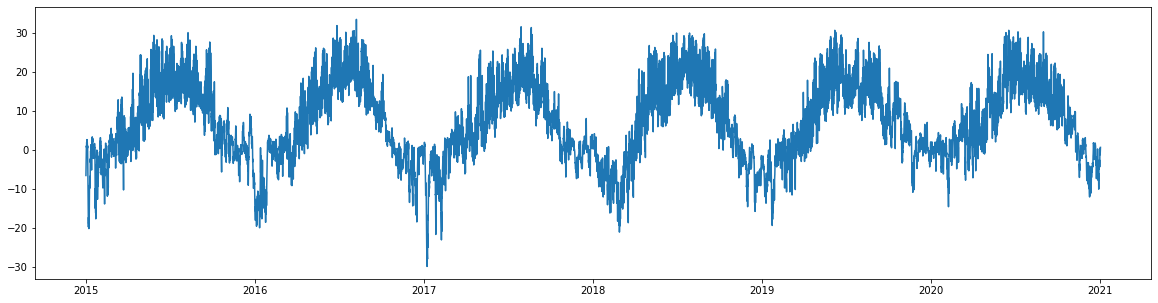

In [ ]:
x = data['date']
y = data['T']
plt.figure(figsize=[20, 5])
plt.plot(x, y, label='T')

#1. Функции минимума, максимума, скользящее среднее

In [ ]:
data['T'].min(), data['T'].max(), data['T'].mean()

(-29.9, 33.4, 7.061320112763712)

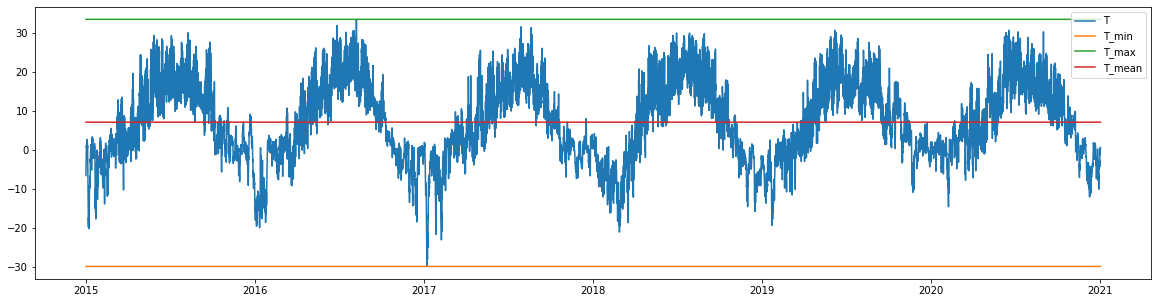

In [ ]:
data['T_min'] = data['T'].min()
data['T_max'] = data['T'].max()
data['T_mean'] = data['T'].mean()

plt.figure(figsize=[20, 5])
plt.plot(x, data['T'], label='T')
plt.plot(x, data['T_min'], label='T_min')
plt.plot(x, data['T_max'], label='T_max')
plt.plot(x, data['T_mean'], label='T_mean')
plt.legend()

In [ ]:
# Хочется посмотреть усреднение значения, какую-то кривую, которая бы показывала динамику - скользящее среднее

In [ ]:
data['T'].rolling(3).mean()  # rolling - считает некоторую аггрегированную функцию в окне ширины X (напр. 3)

0             NaN
1             NaN
2       -6.233333
3       -5.866667
4       -5.500000
           ...   
20570   -0.933333
20571   -0.733333
20572   -0.433333
20573   -0.033333
20574    0.300000
Name: T, Length: 20575, dtype: float64

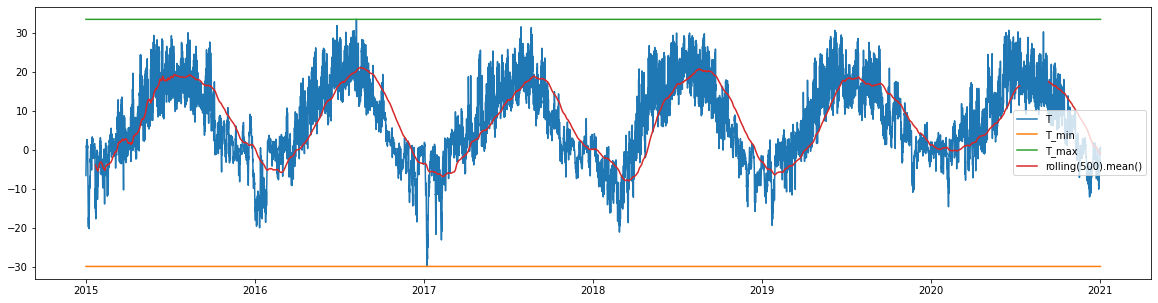

In [ ]:
plt.figure(figsize=[20, 5])
plt.plot(x, data['T'], label='T')
plt.plot(x, data['T_min'], label='T_min')
plt.plot(x, data['T_max'], label='T_max')
plt.plot(x, data['T'].rolling(500).mean(), label='rolling(500).mean()')
plt.legend()

# Таким образом можно отсекать аномалии и убирать шум

#2. Гистограмма, квантиль

In [ ]:
# На практике нам часто нужны не максимальные и минимальные значения (потому что они могут сильно меняться во времени)
# Чтобы посмотреть, какие значения наиболее вероятны, можно использовать гистограммы и доверительные интервалы (ограничения не по макс/минимуму а по границам наиболее вероятных значений)

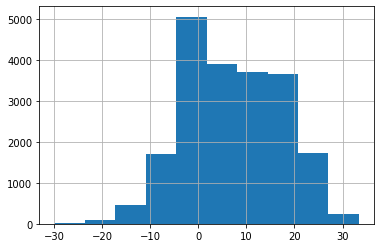

In [ ]:
# Гистограмма - это функция, которая показывает, сколько раз встречалось то или иное значение

data['T'].hist()

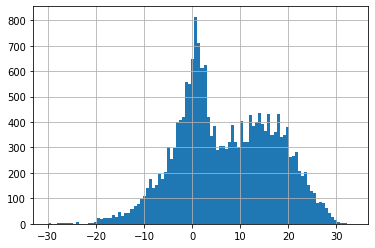

In [ ]:
data['T'].hist(bins=100)

In [ ]:
# Как определить численно, какие значения были наиболее вероятны?
# "95%-й квантиль равен 23 градусам" = температура не превышала 23 градуса в 95% случаев

In [ ]:
data['T'].quantile(0.95), data['T'].quantile(0.05)

(23.2, -8.6)

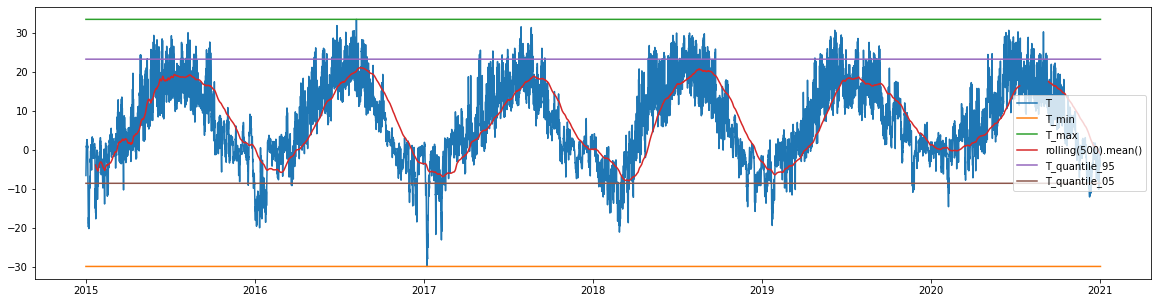

In [ ]:
data['T_quantile_95'] = data['T'].quantile(0.95)
data['T_quantile_05'] = data['T'].quantile(0.05)

plt.figure(figsize=[20, 5])
plt.plot(x, data['T'], label='T')
plt.plot(x, data['T_min'], label='T_min')
plt.plot(x, data['T_max'], label='T_max')
plt.plot(x, data['T'].rolling(500).mean(), label='rolling(500).mean()')
plt.plot(x, data['T_quantile_95'], label='T_quantile_95')
plt.plot(x, data['T_quantile_05'], label='T_quantile_05')
plt.legend()

#3. Корреляция параметров

In [ ]:
# Корреляция - функция, которая показывает, насколько два ряда синхронно движутся между собой. Значения - от 1 (синхронно) до -1 (в противофазе)

In [ ]:
# data.corr()  # -1.052304e-01 - цифры в научном формате - сделаем округление
data.corr().round(2)

,T,Po,P,Pa,U,Ff,ff10,ff3,Tn,Tx,VV,Td,tR,Tg,T_min,T_max,T_mean,T_quantile_95,T_quantile_05
T,1.00,-0.11,-0.17,-0.08,-0.45,-0.10,0.08,-0.04,0.97,0.98,0.28,0.87,0.01,0.85,-0.0,-0.0,-0.0,0.0,-0.0
Po,-0.11,1.00,1.00,0.06,-0.18,-0.11,-0.09,-0.02,-0.15,-0.09,0.22,-0.21,-0.02,-0.15,0.0,-0.0,-0.0,-0.0,0.0
P,-0.17,1.00,1.00,0.06,-0.15,-0.10,-0.09,-0.02,-0.22,-0.16,0.20,-0.27,-0.02,-0.20,0.0,-0.0,-0.0,-0.0,0.0
Pa,-0.08,0.06,0.06,1.00,0.09,0.05,0.09,0.22,0.02,0.08,-0.00,-0.02,-0.03,-0.05,-0.0,0.0,-0.0,-0.0,0.0
U,-0.45,-0.18,-0.15,0.09,1.00,-0.23,0.04,-0.06,-0.18,-0.35,-0.65,0.04,0.01,0.01,-0.0,0.0,-0.0,-0.0,-0.0
Ff,-0.10,-0.11,-0.10,0.05,-0.23,1.00,0.42,0.33,-0.12,-0.36,0.13,-0.23,-0.00,-0.11,0.0,-0.0,-0.0,0.0,0.0
ff10,0.08,-0.09,-0.09,0.09,0.04,0.42,1.00,0.53,0.30,0.13,-0.24,0.11,NaN,NaN,0.0,-0.0,-0.0,0.0,0.0
ff3,-0.04,-0.02,-0.02,0.22,-0.06,0.33,0.53,1.00,-0.12,0.03,-0.01,-0.08,NaN,-0.23,-0.0,-0.0,-0.0,-0.0,0.0
Tn,0.97,-0.15,-0.22,0.02,-0.18,-0.12,0.30,-0.12,1.00,NaN,0.11,0.96,NaN,0.97,-0.0,0.0,-0.0,-0.0,0.0
Tx,0.98,-0.09,-0.16,0.08,-0.35,-0.36,0.13,0.03,NaN,1.00,0.13,0.89,NaN,NaN,-0.0,0.0,-0.0,-0.0,-0.0


In [ ]:
# Корреляция помогает определять, с помощью каких параметров можно делать прогноз, а какие никакой предсказательной силы не несут

In [ ]:
# Корреляция ряда с самим собой помогает визуализировать сезонность

#4. Автокорреляция, сезонность

In [ ]:
# Автокорреляция - корреляция ряда со сдвинутой версией себя corr(X, X+lag)

In [ ]:
condition = data['T'].notna()  # оставить только данные без пропусков
data2 = data[condition]

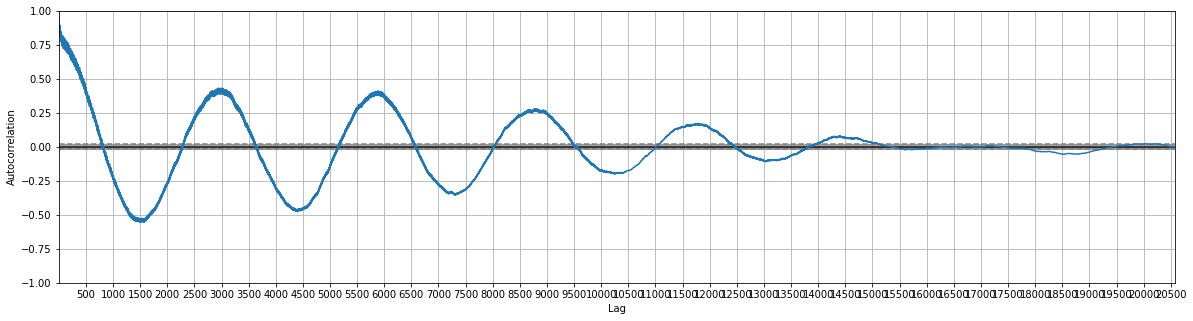

In [ ]:
plt.figure(figsize=[20,5])
pd.plotting.autocorrelation_plot(data2['T'])
plt.locator_params(axis='x', nbins=50)

In [ ]:
# Интервал повторяемости - 3000 записей: потому что в сутках много записей - каждые 3 часа делаются замеры.
# А мы хотим посмотреть, как температура менялась в разрезе дней - для этого отфильтруем записи, отставив только сделанные в 12 часов

data_daily = data2[data2['date'].dt.hour == 12]
data_daily

,Местное время в Москве (ВДНХ),T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss,date,T_min,T_max,T_mean,T_quantile_95,T_quantile_05
12,01.01.2015 12:00,-1.5,743.6,758.5,0.2,96.0,"Ветер, дующий с западо-юго-запада",1,NaN,NaN,"90 или более, но не 100%",Снег с перерывами слабый в срок наблюдения.,Снег или дождь со снегом.,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",70 – 80%.,1000-1500,"Высококучевые просвечивающие, расположенные на...","Перистых, перисто-кучевых или перисто-слоистых...",4.0,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 12:00:00,-29.9,33.4,7.06132,23.2,-8.6
36,02.01.2015 12:00,1.5,737.6,752.2,-0.5,97.0,"Ветер, дующий с запада",2,NaN,NaN,100%.,Дымка.,Облака покрывали более половины неба в течение...,Облака покрывали более половины неба в течение...,NaN,NaN,Слоистые разорванные или кучевые разорванные о...,100%.,200-300,NaN,NaN,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-02 12:00:00,-29.9,33.4,7.06132,23.2,-8.6
60,03.01.2015 12:00,2.4,726.1,740.4,0.6,89.0,"Ветер, дующий с запада",2,NaN,NaN,100%.,Дымка.,Облака покрывали более половины неба в течение...,Облака покрывали более половины неба в течение...,NaN,NaN,Слоистые разорванные или кучевые разорванные о...,100%.,300-600,NaN,NaN,4.0,0.8,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-03 12:00:00,-29.9,33.4,7.06132,23.2,-8.6
84,04.01.2015 12:00,0.8,722.2,736.5,0.2,93.0,"Ветер, дующий с западо-юго-запада",2,NaN,NaN,100%.,Ливневый снег слабый в срок наблюдения или за ...,Ливень (ливни).,Снег или дождь со снегом.,NaN,NaN,Кучево-дождевые волокнистые (часто с наковальн...,100%.,300-600,NaN,NaN,4.0,-0.2,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-04 12:00:00,-29.9,33.4,7.06132,23.2,-8.6
108,05.01.2015 12:00,-8.5,733.3,748.4,1.2,79.0,"Ветер, дующий с северо-запада",3,NaN,NaN,100%.,Снег с перерывами слабый в срок наблюдения.,Снег или дождь со снегом.,Песчаная или пыльная буря или снежная низовая ...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",60%.,600-1000,"Высококучевые, просвечивающие или плотные в дв...",NaN,4.0,-11.5,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-05 12:00:00,-29.9,33.4,7.06132,23.2,-8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20539,28.12.2020 12:00,-6.5,759.4,775.0,0.3,86.0,"Ветер, дующий с юго-юго-востока",1,NaN,NaN,"90 или более, но не 100%",Дымка.,Облака покрывали более половины неба в течение...,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.","90 или более, но не 100%",600-1000,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,-8.5,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-28 12:00:00,-29.9,33.4,7.06132,23.2,-8.6
20547,29.12.2020 12:00,-5.6,755.5,770.8,-0.7,84.0,"Ветер, дующий с юго-востока",2,NaN,NaN,"90 или более, но не 100%",Дымка.,Облака покрывали более половины неба в течение...,Облака покрывали более половины неба в течение...,NaN,NaN,Слоистые разорванные или кучевые разорванные о...,60%.,300-600,"Высококучевых, высокослоистых или слоисто-дожд...","Перистые нитевидные, иногда когтевидные, не ра...",10.0,-7.9,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-29 12:00:00,-29.9,33.4,7.06132,23.2,-8.6
20555,30.12.2020 12:00,-3.1,752.8,767.9,1.0,95.0,"Ветер, дующий с юго-юго-востока",1,NaN,NaN,100%.,Дымка.,Облака покрывали более половины неба в течение...,Облака покрывали более половины неба в течение...,NaN,NaN,Слоистые туманообразные или слоистые разорванн...,100%.,200-300,NaN,NaN,4.0,-3.8,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-30 12:00:00,-29.9,33.4,7.06132,23.2,-8.6
20563,31.12.2020 12:00,-2.2,749.7,764.7,-0.6,96.0,"Ветер, дующий с юго-юго-востока",1,NaN,NaN,100%.,Дымка.,Облака покрывали более половины неба в течение...,Облака покрывали более половины неба в течение...,NaN,NaN,Слоистые туманообразные или слоистые разорванн...,100%.,100-200,NaN,NaN,4.0,-2.8,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-31 12:00:00,-29.9,

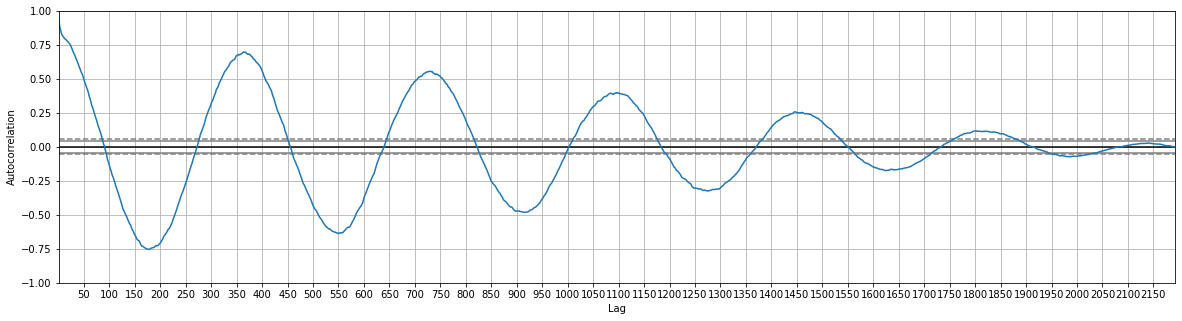

In [ ]:
plt.figure(figsize=[20,5])
pd.plotting.autocorrelation_plot(data_daily['T'])
plt.locator_params(axis='x', nbins=50)

In [ ]:
# В данном случае пик, когда ряд повторяет сам себя (сезонность) визуализируется хорошо, если сезонности нет - он быстро упадет к 0

#5. Тренд

In [ ]:
from sklearn.linear_model import LinearRegression

# Разобьем датасет на обучающую выборку и тестовую (для которой будем делать прогноз)
data_train = data2[data['date'].dt.year < 2020]
data_test = data2[data['date'].dt.year >= 2020]

X_train = data_train.index
y_train = data_train['T']

X_test = data_test.index
y_test = data_test['T']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


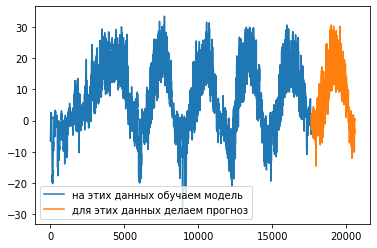

In [ ]:
plt.plot(X_train, y_train, label='на этих данных обучаем модель')
plt.plot(X_test, y_test, label='для этих данных делаем прогноз')
plt.legend()

In [ ]:
model = LinearRegression()  # параметры не подстроены под обучащие данные ("a" и "b" случайные)

In [ ]:
X_train = pd.DataFrame(data_train.index)
y_train = data_train['T']

X_test = pd.DataFrame(data_test.index)
y_test = data_test['T']

In [ ]:
X_test

,0
0,17639
1,17640
2,17641
3,17642
4,17643
...,...
2930,20570
2931,20571
2932,20572
2933,20573


In [ ]:
model.fit(X_train, y_train)  # Модель требует в качестве X двумерную таблицу, поэтому создадим объект DataFrame

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
trend_history = model.predict(X_train)

In [ ]:
trend_history

array([5.18692439, 5.18711881, 5.18731323, ..., 8.61570282, 8.61589724,
       8.61609166])

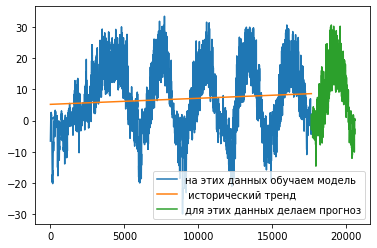

In [ ]:
plt.plot(X_train[0], y_train, label='на этих данных обучаем модель')
plt.plot(X_train[0], trend_history, label=' исторический тренд')
plt.plot(X_test[0], y_test, label='для этих данных делаем прогноз')

plt.legend()

In [ ]:
# спрогнозируем данные "в будущее"

trend_future = model.predict(X_test)

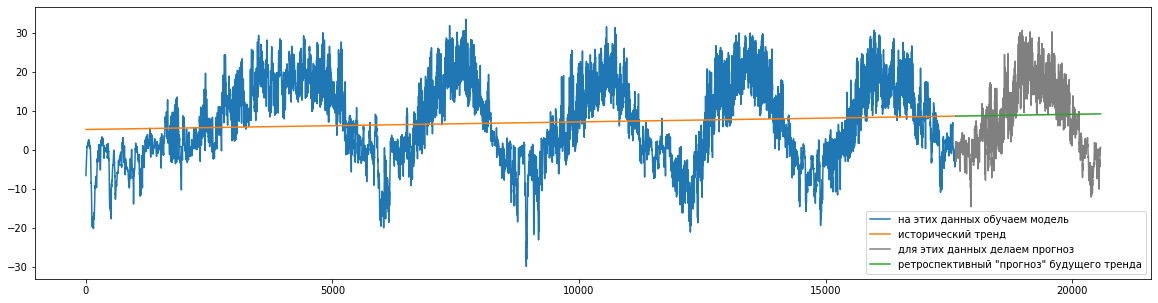

In [ ]:
plt.figure(figsize=[20, 5])
plt.plot(X_train[0], y_train, label='на этих данных обучаем модель')
plt.plot(X_train[0], trend_history, label='исторический тренд')
plt.plot(X_test[0], y_test, label='для этих данных делаем прогноз', color='gray')
plt.plot(X_test[0], trend_future, label='ретроспективный "прогноз" будущего тренда')

plt.legend()

In [ ]:
trend_history

array([5.18692439, 5.18711881, 5.18731323, ..., 8.61570282, 8.61589724,
       8.61609166])

In [ ]:
trend_future

array([8.61628607, 8.61648049, 8.61667491, ..., 9.18651782, 9.18671224,
       9.18690666])

In [ ]:
# Посмотрим, насколько выросла температура за 5 лет

In [ ]:
# Для того, чтобы взять первый элемент списка - нужно обратиться к элементу с номером 0 (так во многих языках программирования)
# Для того, чтобы получить последний элемент - к элементу под номером -1
a = trend_history[0]
b = trend_history[-1]

a, b

(5.186924388327812, 8.616091655665613)

In [ ]:
(b-a)/a

0.661117650963737